# Pandas Basics — Part 1 — Teaching Demonstration

In today's class, we're going to introduce some of the basics of [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files.

We will cover how to:

* Import Pandas
* Read in a CSV file
* Calculate summary statistics and frequencies
* Explore and filter data
* Make simple plots and data visualizations

___

## Dataset
### The Bellevue Almshouse Dataset

> Nineteenth-century immigration data was produced with the express purpose of reducing people to bodies; bodies to easily quantifiable aspects; and assigning value to those aspects which proved that the marginalized people to who they belonged were worth less than their elite counterparts.

> — Anelise Shrout, ["(Re)Humanizing Data"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)


The dataset that we're working with in this lesson is the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/), created by historian and DH scholar Anelise Shrout. It includes information about Irish-born immigrants who were admitted to New York City's Bellevue Almshouse in the 1840s.

The Bellevue Almshouse was part of New York City's public health system, a place where poor, sick, homeless, and otherwise marginalized people were sent — sometimes voluntarily and sometimes forcibly. Devastated by widespread famine in Ireland, many Irish people fled their homes for New York City in the 1840s, and many of them ended up in the Bellevue Almshouse.

We're using the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/) to practice data analysis with Pandas because we want to think deeply about the consequences of reducing human life to data. As Shrout argues in [her essay](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/), this data purposely reduced people to bodies and "easily quantifiable aspects" in order to devalue their lives, potentially enacting "both epistemic and physical violence" on them.

___

## Import Pandas


> If you installed Python with Anaconda, you should already have Pandas installed. If you did not install Python with Anaconda, see [Pandas Installation](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html).


To use the Pandas library, we first need to `import` it.

In [4]:
import pandas as pd

The above `import` statement not only imports the Pandas library but also gives it an alias or nickname — `pd`. This alias will save us from having to type out the entire words `pandas` each time we need to use it. Many Python libraries have commonly used aliases like `pd`.

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [5]:
pd.options.display.max_rows = 200

## Read in CSV File

To read in a CSV file, we will use the method `pd.read_csv()` and insert the name of our desired file path. 

In [6]:
pd.read_csv('Bellevue_Almshouse_Dataset.csv', delimiter=',', encoding='utf-8')

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
0,1847-04-17,Mary,Gallagher,Mary Gallagher,28.0,f,recent emigrant,married,Child Alana 10 days,Hospital,superintendent,hd. gibbens
1,1847-04-08,John,Sanin (?),John Sanin (?),19.0,m,recent emigrant,laborer,Catherine 2 mo,NaN,george w. anderson,edward witherell
2,1847-04-17,Anthony,Clark,Anthony Clark,60.0,m,recent emigrant,laborer,Charles Riley afed 10 days,Hospital,george w. anderson,edward witherell
3,1847-04-08,Lawrence,Feeney,Lawrence Feeney,32.0,m,recent emigrant,laborer,Child,NaN,george w. anderson,james donnelly
4,1847-04-13,Henry,Joyce,Henry Joyce,21.0,m,recent emigrant,NaN,Child 1 mo,NaN,george w. anderson,edward witherell
...,...,...,...,...,...,...,...,...,...,...,...,...
9593,1846-05-23,Joseph,Aton,Joseph Aton,69.0,m,NaN,shoemaker,NaN,NaN,[blank],NaN
9594,1847-06-17,Mary,Smith,Mary Smith,47.0,f,NaN,NaN,NaN,Hospital Ward 38,[blank],NaN
9595,1847-06-22,Francis,Riley,Francis Riley,29.0,m,lame,superintendent,NaN,NaN,[blank],NaN
9596,1847-07-02,Martin,Dunn,Martin Dunn,4.0,m,NaN,NaN,NaN,NaN,[blank],NaN


This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe), one of the two main data structures in Pandas. A DataFrame looks and acts a lot like a spreadsheet, but it has special powers and functions that we will discuss below and in the next few lessons.

| Pandas objects | Explanation                         |
|----------|-------------------------------------|
| `DataFrame`    | Like a spreadsheet, 2-dimensional    |
| `Series`      | Like a column, 1-dimensional                     |

When reading in the CSV file, we also specified a `delimiter` and `encoding`. The `delimiter` specifies the character that separates or "delimits" the columns in our dataset. For CSV files, the delimiter will most often be a comma. (CSV is short for *Comma Separated Values*.) Sometimes, however, the delimiter of a CSV file might be a tab (`\t`) or, more rarely, another character.

We assign the DataFrame to a variable called `bellevue_df`. It is common convention to name DataFrame variables `df`, but we want to be a bit more specific. 

In [7]:
bellevue_df = pd.read_csv('Bellevue_Almshouse_Dataset.csv', delimiter=',', encoding='utf-8')

## Begin to Examine Data

We can display a DataFrame in a Jupyter notebook simply by running a cell with the variable name of the DataFrame.

In [8]:
bellevue_df

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
0,1847-04-17,Mary,Gallagher,Mary Gallagher,28.0,f,recent emigrant,married,Child Alana 10 days,Hospital,superintendent,hd. gibbens
1,1847-04-08,John,Sanin (?),John Sanin (?),19.0,m,recent emigrant,laborer,Catherine 2 mo,NaN,george w. anderson,edward witherell
2,1847-04-17,Anthony,Clark,Anthony Clark,60.0,m,recent emigrant,laborer,Charles Riley afed 10 days,Hospital,george w. anderson,edward witherell
3,1847-04-08,Lawrence,Feeney,Lawrence Feeney,32.0,m,recent emigrant,laborer,Child,NaN,george w. anderson,james donnelly
4,1847-04-13,Henry,Joyce,Henry Joyce,21.0,m,recent emigrant,NaN,Child 1 mo,NaN,george w. anderson,edward witherell
...,...,...,...,...,...,...,...,...,...,...,...,...
9593,1846-05-23,Joseph,Aton,Joseph Aton,69.0,m,NaN,shoemaker,NaN,NaN,[blank],NaN
9594,1847-06-17,Mary,Smith,Mary Smith,47.0,f,NaN,NaN,NaN,Hospital Ward 38,[blank],NaN
9595,1847-06-22,Francis,Riley,Francis Riley,29.0,m,lame,superintendent,NaN,NaN,[blank],NaN
9596,1847-07-02,Martin,Dunn,Martin Dunn,4.0,m,NaN,NaN,NaN,NaN,[blank],NaN


### ❓🧐  What do you notice about the data already?

*Jot down some observations (double-click to type)*

## Begin to Examine Patterns

### Select Columns

To select a column from the DataFrame, we will type the name of the DataFrame followed by square brackets and a column name in quotations marks.

In [9]:
bellevue_df['age']

0       28.0
1       19.0
2       60.0
3       32.0
4       21.0
        ... 
9593    69.0
9594    47.0
9595    29.0
9596     4.0
9597    32.0
Name: age, Length: 9598, dtype: float64

Technically, a single column in a DataFrame is a [*Series* object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro).

In [10]:
type(bellevue_df['age'])

pandas.core.series.Series

| Pandas method | Explanation                         |
|----------|-------------------------------------|
| `.sum()`      | Sum of values                       |
| `.mean()`     | Mean of values                      |
| `.median()`   | Median of values         |
| `.min()`      | Minimum                             |
| `.max()`      | Maximum                             |
| `.mode()`     | Mode                                |
| `.std()`      | Unbiased standard deviation         |
| `.count()`    | Total number of non-blank values    |
| `.value_counts()` | Frequency of unique values |

### ❓🧐  How old are people on average?

In [11]:
bellevue_df['age'].mean()

30.337039170506916

### ❓🧐  How old is the oldest person?

In [ ]:
bellevue_df['age'].max()

### ❓🧐  How young is the youngest person?

In [ ]:
bellevue_df['age'].min()

We can also plot the distribution of ages with a histogram by running `hist()`.

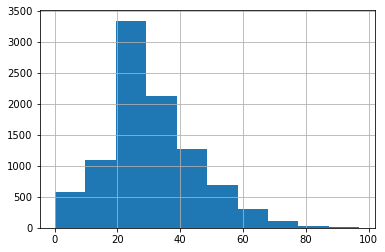

In [18]:
bellevue_df['age'].hist()

### ❓🧐  What are the most common professions?

To count the values in a column, we can use the `.value_counts()` method.

In [12]:
bellevue_df['profession'].value_counts()

laborer                        3116
married                        1586
spinster                       1522
widow                          1055
shoemaker                       158
tailor                          116
blacksmith                      104
mason                            99
weaver                           66
carpenter                        65
baker                            48
waiter                           41
clerk                            28
stone cutter                     27
painter                          26
gardener                         25
cooper                           24
farmer                           21
peddler                          20
cartman                          15
wheelwright                      14
hatter                           12
hostler                          12
butcher                          11
printer                          11
tinsmith                         10
boot maker                       10
teacher                     

### 🛑   What stands out to you about this list? What kind of patterns do you notice?

*Jot down your thoughts here (double-click cell to type)*

### ❓🧐  What are the most common diseases?

In [17]:
bellevue_df['disease'].value_counts()

sickness           2710
recent emigrant    1975
destitution         846
fever               192
insane              138
pregnant            134
sore                 79
intemperance         71
illegible            47
typhus               46
injuries             32
ulcers               26
ophthalmia           19
vagrant              17
lame                 15
debility             12
rheumatism           11
blind                 9
bronchitis            9
dropsy                8
phthisis              8
old age               7
syphilis              7
dysentery             6
diarrhea              6
erysipelas            6
cripple               5
broken bone           5
measles               3
burn                  3
drunkenness           3
piles                 2
sprain                2
pneumonia             2
scarletina            2
fits                  2
abandonment           2
tuberculosis          2
jaundice              2
delusion dreams       2
scrofula              2
contusion       

### 🛑   What stands out to you about this list? What kind of patterns do you notice?

*Jot down your thoughts here (double-click cell to type)*

In [ ]:
bellevue_df['disease'].value_counts()[:10].plot(kind='bar')

### ❓🧐  Where were most people sent?

In [ ]:
bellevue_df['sent_to'].value_counts()[:10]

## Examine Subsets

### ❓🧐  Why were people being sent to Hostpital Ward 38?

To explore this question, we can filter rows with a condition.

In [ ]:
bellevue_df['sent_to'] == 'Hospital Ward 38'

In [ ]:
bellevue_df[]

In [ ]:
.value_counts()

## ❓🧐  What data is missing? What data do you wish we had?